# SVM ソフトマージン
sklearn.model_selection.train_test_split http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html  
sklearn.metrics http://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics  

matplotlibのカラーマップを使用
https://matplotlib.org/users/colormaps.html

In [1]:
# -*- coding: utf-8 -*-
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm # maplotlibのカラーマップを使用
%matplotlib inline

from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import   accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, classification_report
from sklearn.datasets import make_classification

FLAG_fig = False

In [2]:
X, y = make_classification( n_samples=100, n_features=2, n_informative=2, n_redundant=0, 
                            n_classes=2, n_clusters_per_class=1, 
                            class_sep=0.4, #　大きいほどクラス分離の距離が大きい 
                            shift=None, 
                            random_state=5) # 整数を与えると乱数の再現性がある

#### トレーニングデータとテストデータに分離（split）
sklearn.model_selection.train_test_split  
http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

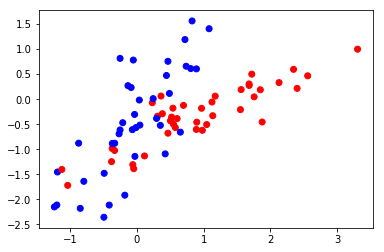

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
plt.scatter(X_train[:,0], X_train[:,1], c=y_train, cmap=cm.bwr)
if FLAG_fig: plt.savefig('fig_SVM_SM_Train.png')
plt.show()

In [6]:
clf = svm.SVC(kernel='linear', C=10000) # Cの値を大きくして，なるべく他クラスへの混入を認めない
clf.fit(X_train, y_train)

SVC(C=10000, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

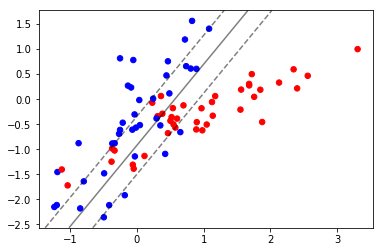

In [7]:
plt.scatter(X_train[:, 0], X_train[:, 1], s=30, c=y_train, cmap=cm.bwr)
# plot hyper-plane and margin liness as the lines
ax = plt.gca() # get current axis
xlim = ax.get_xlim()
ylim = ax.get_ylim()
# create grid to evaluate the lines
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
# 超平面までの距離を求め，次にグリッドに合わせてreshape((30,30))
Z = clf.decision_function(xy).reshape(XX.shape)
# マージンの境界線と超平面を等高線に描く
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, #等高線の本数と間隔をlevelsで指定
           linestyles=['--', '-', '--'])
# plot support vectors
#ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=200, c='w', edgecolors='k')
if FLAG_fig: plt.savefig('fig_SVM_SM_Train_Result.png')
plt.show()

#### トレーニングデータに対する評価

In [8]:
y_train[0:10]
print('トレーニングデータ　正解率', clf.score(X_train, y_train))   

トレーニングデータ　正解率 0.8


In [9]:
y_train_pred = clf.predict(X_train)
print("予測値: %s" % y_train_pred)
print("真値　: %s" % y_train)

予測値: [0 1 0 1 0 0 1 0 0 0 0 0 1 1 0 1 0 1 1 1 1 1 0 1 1 0 0 0 0 0 1 0 1 0 0 1 0
 0 0 0 1 1 0 1 0 1 0 1 1 1 1 1 0 0 0 1 0 1 1 1 0 0 1 0 0 0 0 1 1 1 1 0 1 1
 0 0 1 0 1 1]
真値　: [0 1 0 1 1 1 1 0 1 0 0 0 1 0 0 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 1 0 1 0 0 1 1
 0 0 0 1 0 0 1 0 1 0 0 0 0 1 1 0 0 0 1 0 1 1 1 0 0 1 1 0 0 0 1 1 1 0 1 0 1
 0 0 1 0 1 1]


トレーニングデータに対する評価，下記のaccuracy と上記のclf.score()は同じ計算

In [10]:
print('confusion = \n %s' % confusion_matrix(y_train, y_train_pred)) # 混同行列
print('accuracy = %f ' % accuracy_score(y_train, y_train_pred))  # 正答率
print('precision = %f ' % precision_score(y_train, y_train_pred)) # 適合率
print('recall = %f ' % recall_score(y_train, y_train_pred)) # 再現率
print('F-measure = %f' % f1_score(y_train, y_train_pred)) # F-値

confusion = 
 [[32  7]
 [ 9 32]]
accuracy = 0.800000 
precision = 0.820513 
recall = 0.780488 
F-measure = 0.800000


In [11]:
print( classification_report(y_train, y_train_pred)) # 正答率（accuracy）はavg/totalに

              precision    recall  f1-score   support

           0       0.78      0.82      0.80        39
           1       0.82      0.78      0.80        41

   micro avg       0.80      0.80      0.80        80
   macro avg       0.80      0.80      0.80        80
weighted avg       0.80      0.80      0.80        80



上記の結果の見方，"0", "1"はクラス名で，それぞれの立場での 評価指標が示されている。
上記の一つ一つの評価では，"1"の立場で見ていることと同じである。また，F-measureとf1-scoreは同じ量を示す。

#### テストデータに対する評価

In [12]:
y_test_pred = clf.predict(X_test)
print("予測値: %s" % y_test_pred)
print("真値　: %s" % y_test)

予測値: [0 1 0 1 1 1 0 0 0 0 1 1 1 0 0 0 0 1 0 1]
真値　: [1 1 0 1 1 1 0 0 0 0 1 1 0 0 0 0 0 1 0 1]


In [13]:
print('テストデータ　　　　　正解率', clf.score(X_test, y_test))   
print('confusion = \n %s' % confusion_matrix(y_test, y_test_pred))
print('accuracy = %f ' % accuracy_score(y_test, y_test_pred))
print('precision = %f ' % precision_score(y_test, y_test_pred))
print('recall = %f ' % recall_score(y_test, y_test_pred))
print('F-measure = %f' % f1_score(y_test, y_test_pred))

テストデータ　　　　　正解率 0.9
confusion = 
 [[10  1]
 [ 1  8]]
accuracy = 0.900000 
precision = 0.888889 
recall = 0.888889 
F-measure = 0.888889


In [14]:
print( classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91        11
           1       0.89      0.89      0.89         9

   micro avg       0.90      0.90      0.90        20
   macro avg       0.90      0.90      0.90        20
weighted avg       0.90      0.90      0.90        20



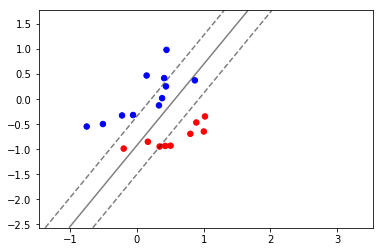

In [15]:
plt.scatter(X_test[:, 0], X_test[:, 1], s=30, c=y_test, cmap=cm.bwr)
ax = plt.gca() # get current axis
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,            linestyles=['--', '-', '--'])
if FLAG_fig: plt.savefig('fig_SVM_SM_Test.png')
plt.show()